In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Import datasets

In [3]:
d13 = pd.read_stata('./data/2013', convert_categoricals=False)
d14 = pd.read_stata('./data/2014', convert_categoricals=False)
d15 = pd.read_stata('./data/2015', convert_categoricals=False)
d16 = pd.read_stata('./data/2016', convert_categoricals=False)
d17 = pd.read_stata('./data/2017', convert_categoricals=False)
d18 = pd.read_stata('./data/2018', convert_categoricals=False)
d19 = pd.read_stata('./data/2019', convert_categoricals=False)
d20 = pd.read_stata('./data/2020', convert_categoricals=False)
d21 = pd.read_stata('./data/2021', convert_categoricals=False)
d22 = pd.read_stata('./data/2022', convert_categoricals=False)

Recode pre-2017 LFSSTAT variables and rename EDUC90 to EDUC

In [4]:
pre = pd.concat([d13, d14, d15, d16])

def recode(LFSSTAT):
	if LFSSTAT == 4:
		return 3
	elif LFSSTAT == 5:
		return 3
	elif LFSSTAT == 6:
		return 4
	else:
		return LFSSTAT

pre.rename(columns={'EDUC90':'EDUC'}, inplace=True)

pre['LFSSTAT'] = pre['LFSSTAT'].apply(recode)

Append the rest of the data to the master

In [5]:
post = pd.concat([d17, d18, d19, d20, d21, d22])
master = pd.concat([pre, post])

Keep only prime age - 20 to 64 & Non-students

In [6]:
master = master[(master['AGE_12'] >= 2) & (master['AGE_12'] <= 10) & (master['SCHOOLN'] == 1)]

    QUESTION 1

        1a) Educational attainment

Generating new 'edu' variable and populating it

In [7]:
master['edu'] = np.nan

In [8]:
def recodeEDU(EDUC):
    if EDUC <= 1:
        return 1
    elif (EDUC == 2 or EDUC == 3):
        return 2
    elif EDUC == 4:
        return 3
    elif EDUC == 5:
        return 4
    elif EDUC == 6:
        return 5
    else:
        return EDUC

master['edu'] = master['EDUC'].apply(recodeEDU)

In [9]:
master['edu'].value_counts(normalize=True).sort_index()

1    0.101760
2    0.269193
3    0.379968
4    0.173800
5    0.075279
Name: edu, dtype: float64

        1b) Educational attainment over time

In [10]:
educByYear = pd.crosstab(master['SURVYEAR'], master['edu'], normalize='index')
educByYear

edu,1,2,3,4,5
SURVYEAR,,,,,
2013,0.120462,0.288373,0.372295,0.154795,0.064075
2014,0.118577,0.289459,0.371570,0.155208,0.065185
2015,0.112379,0.277708,0.380284,0.163051,0.066579
2016,0.110637,0.274003,0.379812,0.164896,0.070652
2017,0.103271,0.275455,0.382741,0.168699,0.069833
2018,0.102338,0.269140,0.383913,0.170180,0.074429
2019,0.097701,0.262525,0.383998,0.177943,0.077833
2020,0.087580,0.256509,0.389631,0.183827,0.082453
2021,0.081836,0.256831,0.384399,0.193931,0.083002


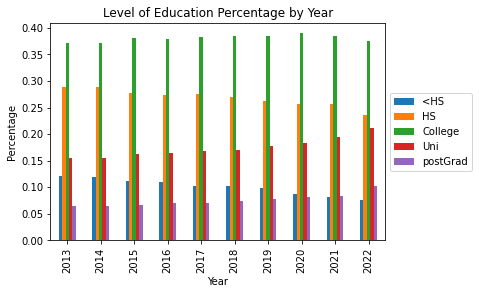

In [56]:
educPlot = educByYear.plot.bar(title="Level of Education Percentage by Year")
educPlot.set_xlabel('Year')
educPlot.set_ylabel('Percentage')
educPlot.legend(labels=['<HS', 'HS', 'College', 'Uni', 'postGrad'], loc='center left', bbox_to_anchor=(1.0, 0.5))

        1c) Educational attainment by gender 

In [20]:
males = master[master['SEX'] == 1]
females = master[master['SEX'] == 2]

In [21]:
pd.crosstab(males['SURVYEAR'], males['edu'], normalize='index')

edu,1,2,3,4,5
SURVYEAR,,,,,
2013,0.137426,0.297233,0.368775,0.132494,0.064073
2014,0.135281,0.300783,0.366732,0.133016,0.064188
2015,0.128299,0.288796,0.378480,0.140987,0.063438
2016,0.128109,0.284394,0.379877,0.140315,0.067305
2017,0.122038,0.285500,0.384829,0.143415,0.064218
2018,0.119600,0.282170,0.383729,0.145537,0.068965
2019,0.115308,0.275743,0.386400,0.151281,0.071269
2020,0.104550,0.271199,0.393331,0.155301,0.075619
2021,0.098497,0.273821,0.387027,0.165614,0.075042


In [22]:
pd.crosstab(females['SURVYEAR'], females['edu'], normalize='index')

edu,1,2,3,4,5
SURVYEAR,,,,,
2013,0.104045,0.279800,0.375701,0.176375,0.064078
2014,0.102385,0.278482,0.376260,0.176721,0.066152
2015,0.096862,0.266901,0.382043,0.184555,0.069640
2016,0.093708,0.263935,0.379750,0.188714,0.073894
2017,0.085077,0.265717,0.380717,0.193214,0.075276
2018,0.085581,0.256491,0.384092,0.194103,0.079734
2019,0.080581,0.249671,0.381663,0.203870,0.084216
2020,0.071086,0.242229,0.386035,0.211555,0.089095
2021,0.065520,0.240193,0.381826,0.221663,0.090798


    QUESTION 2

        2a) Wage-age profiles for education streams

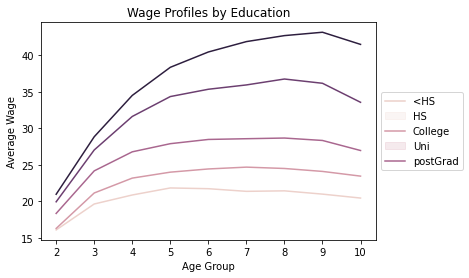

In [55]:
avgHRS = master.groupby(['AGE_12', 'edu']).mean()
wageAgePlot = sns.lineplot(data=avgHRS, x='AGE_12', y='HRLYEARN', hue='edu')
wageAgePlot.set(xlabel='Age Group', ylabel='Average Wage', title='Wage Profiles by Education')
wageAgePlot.legend(labels=['<HS', 'HS', 'College', 'Uni', 'postGrad'], loc='center left', bbox_to_anchor=(1.0, 0.5))